<a href="https://colab.research.google.com/github/jcsnuesi/food_sales_predictions/blob/main/Food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
#Corregir Item_Fat_Content data LF a Low Fat
#Eliminar los tipos de datos NAN
df1 = df.duplicated(keep=False).sum()
df1

0

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
def search_replace(Item_Identifier):

    
    Item_Identifier_filter = df['Item_Identifier'] == Item_Identifier
    
    compate = df[Item_Identifier_filter]['Item_Weight'].mean() 
    if(pd.isnull(float(compate)) != pd.isnull(float('nan'))):
      values_mean = df[Item_Identifier_filter]['Item_Weight'].mean().round(2) 
    else:
      values_mean = 0.00
    
    return values_mean
  

   
item_w_filter_isna = df['Item_Weight'].isna()
df.loc[item_w_filter_isna, 'Item_Weight'] = df.apply(lambda x:search_replace(x['Item_Identifier']), axis=1)




In [7]:
df['Item_Weight'].isna().sum()


0

En la funcion de arriba antes de instanciar la funcion hacemos un filtro de los campos que son Nan de la col 'Item_Weight' donde luego se lo asignamos a un filtro general donde llamaremos dicha columna y le aplicaremos el valor de dataframe con la funcion apply que tiene como primer parametro una funcion lambda donde con una variable x a la que le instanciamos nuestra funcion principal "searched_replace" entro de esta haremos un filtro para buscar por clave en la columna "Item_identifier" sus valores luego incluirlo en un filtro para hacer la media de estos valores y segun sea el valor de la media haremos una validacion, si existe una media le asignamos el valor a la columna "item_weight" de lo contrario le agregamos 0.00 y retornamos la variable valor con todos los cambios realizados.

In [8]:
Item_Fat_Content_filter = df['Item_Fat_Content'] == 'LF'
df.loc[Item_Fat_Content_filter, 'Item_Fat_Content'] = df.apply(lambda x:'Light Fat', axis=1)

En el codigo anterior normalizamos la columna "Item_Fat_Content" en donde cambiamos los valores abreviados por su valor de mayor coincidencia.

In [9]:
regular = df['Item_Fat_Content'] == 'reg'
low_fat = df['Item_Fat_Content'] == 'low fat'

df.loc[regular, 'Item_Fat_Content'] = df.apply(lambda x:'Regular', axis=1)
df.loc[low_fat, 'Item_Fat_Content'] = df.apply(lambda x:'Low Fat', axis=1)

Se filtradon los datos inconsistentes ya que es una categoria con tres opciones y procedí con una funcion lambda a sustituirlos por su argumento original.

In [10]:
df.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']].describe().loc[['min','max','mean']].round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,0.00,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.87,0.07,140.99,1997.83,2181.29


In [11]:
df1 = df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
def imputar_outlet(col):
        
    small = ['OUT010', 'OUT019', 'OUT035', 'OUT046'] 
    med = ['OUT049','OUT018','OUT027','OUT017']  
    high = ['OUT013','OUT045'] 

    Outlet_Size =  1
    reducer = np.array(col['Outlet_Size'].isna().sum())
    size = col['Outlet_Size'].isna()
    id = col.loc[size,'Outlet_Identifier'].to_list()
    i = 0
    
    while Outlet_Size <  reducer:
       
        if id[i] in small:
           compare = df1['Outlet_Identifier'] == id[i]
           df1.loc[size & compare,'Outlet_Size'] = "Small"
           reducer = reducer - 1
          
        elif id[i] in med:
            compare = df1['Outlet_Identifier'] == id[i]
            df1.loc[size & compare,'Outlet_Size'] = "Medium"
            reducer = reducer - 1
            
        elif id[i] in high :
            compare = df1['Outlet_Identifier'] == id[i]
            df1.loc[size & compare,'Outlet_Size'] = "High"
            reducer = reducer - 1
        else:
          reducer = reducer - 1

        
        i = i + 1
          
    return df1

newdata = imputar_outlet(df1)
newdata

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Tomando en cuenta el tipo de comercio en la columna de Outlet_Type pude encontrar un patron en la columna Outlet_Size donde se encontraban los valores nulos, observe que el comercio Type1 es el que tiene mas entradas de datos y segun y tambien que seguian un patron desorganizado pero sin repetir categorias de peso como podran observas en la imagen de abajo. Es por esto que la funcion que vemos arriba busca estos valores faltantes tomando como referencia la columna Outlet_Identifier para luego asignarle el pero a la columna de Outlet_Size.

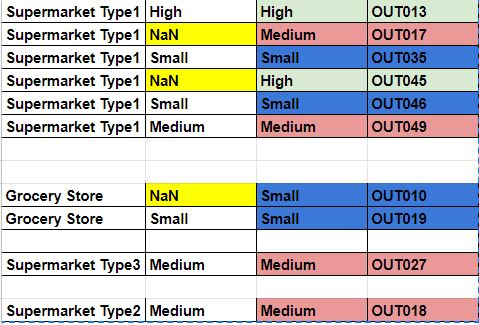

In [13]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


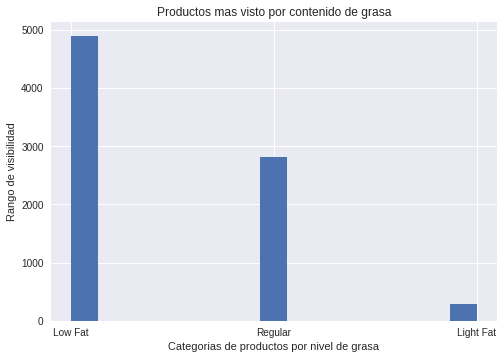

In [14]:
# visibility = newdata['Item_Visibility']
group_fatconten = newdata.groupby(['Item_Visibility'])['Item_Fat_Content'].head()

plt.style.use('seaborn')
plt.hist(group_fatconten, 15)
plt.title("Productos mas visto por contenido de grasa")
plt.xlabel("Categorias de productos por nivel de grasa")
plt.ylabel("Rango de visibilidad")
plt.show()

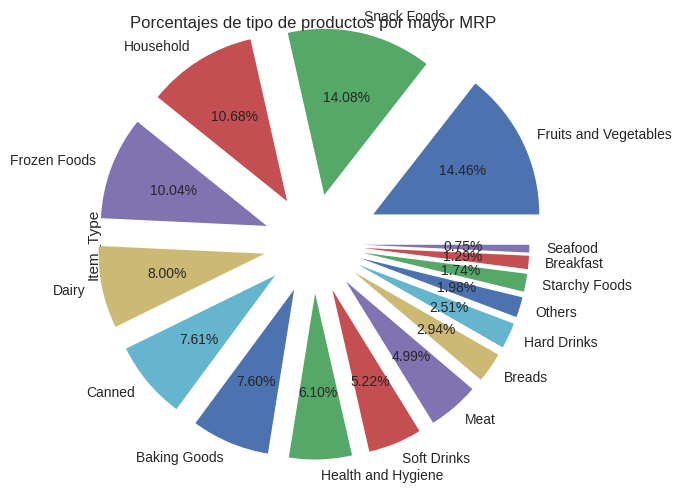

In [33]:
# newdata['Item_MRP']
cero = [0.4]
for i in range(0,len(newdata['Item_Type'].unique())-1):
    cero.append(0.3)

desfase = (cero)

plt.figure(dpi=100)
newdata['Item_Type'].value_counts().plot(kind='pie', autopct='%.2f%%', title='Porcentajes de tipo de productos por mayor MRP', explode=desfase)
plt.show()


In [34]:
newdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.869407,0.066132,140.992782,1997.831867,2181.288914
std,4.653356,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.780000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
newdata.groupby(['Outlet_Size'])['Outlet_Type'].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    1861
Medium       Supermarket Type1    1856
             Supermarket Type3     935
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store        1083
Name: Outlet_Type, dtype: int64

In [18]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


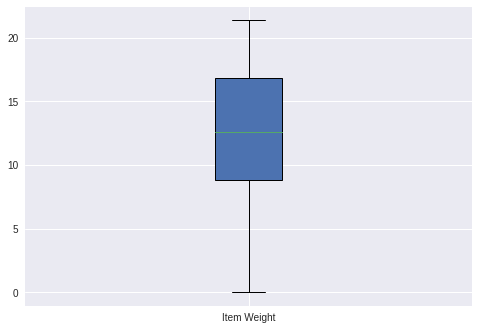

In [19]:
plt.boxplot(newdata['Item_Weight'], patch_artist=True, labels=["Item Weight"])
plt.show()

En este grafico podemos mirar el valor minimo, medio y maximo de los productos por su peso, asi podemos analizar el peso medio de los productos mas vendidos.

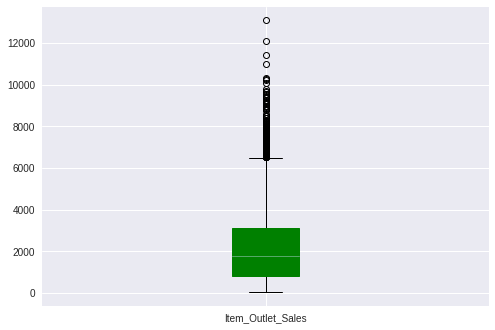

In [20]:
c = "green"
plt.boxplot(newdata['Item_Outlet_Sales'], patch_artist=True, labels=["Item_Outlet_Sales"], boxprops=dict(facecolor=c, color=c))
plt.show()

In [21]:
newdata.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.869407,0.066132,140.992782,1997.831867,2181.288914
std,4.653356,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.780000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


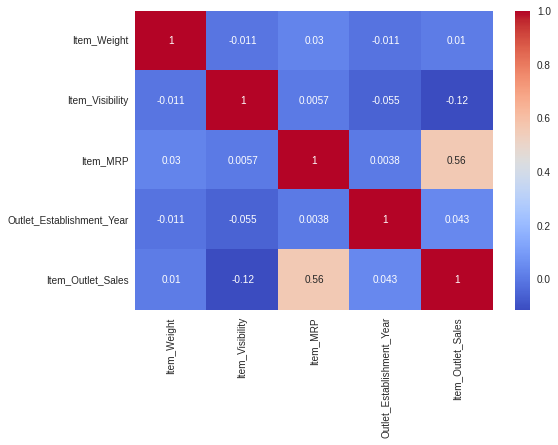

In [37]:
mrps = newdata.corr(method='spearman')

sns.heatmap(mrps, xticklabels=mrps.columns,yticklabels=mrps.columns, cmap='coolwarm', annot= True)


En el grafico de calor anterior podemos visualizar la relacion y el nivel de correlacio que tienen las columnas que se visualizan en el grafico, dandonos un mejor entendimiento de como se relacionan para posteriormente trabajar con estas informaciones.

# Proyecto 1 - Parte 4

In [38]:
df1 = newdata
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


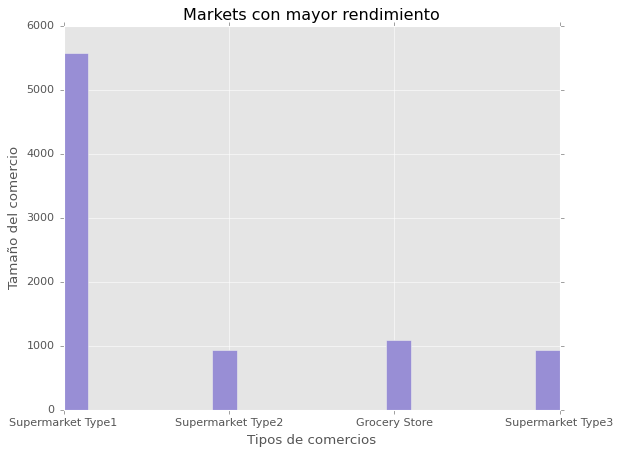

In [110]:
#productos, puntos de ventas , minorista
plt.style.use('ggplot')
df1['Outlet_Type'].hist(color='C9', bins = 20)
plt.title("Markets con mayor rendimiento")
plt.xlabel('Tipos de comercios')
plt.ylabel('Tamaño del comercio')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

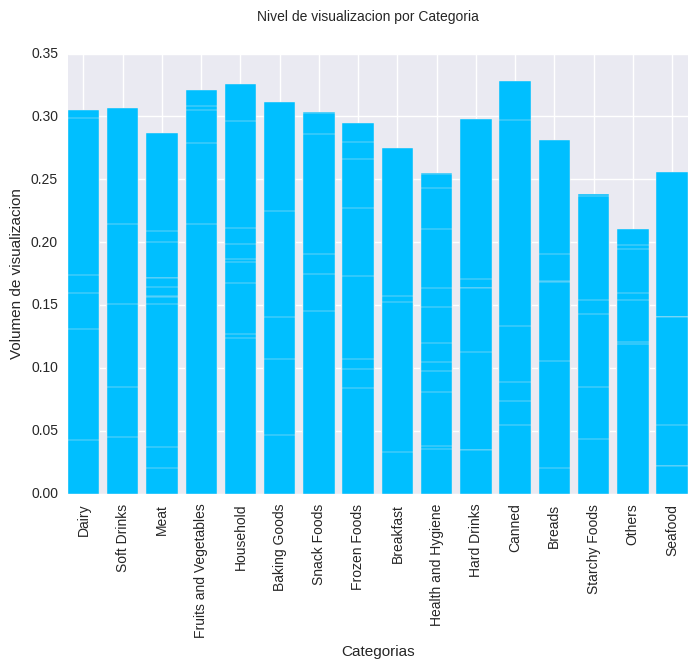

In [113]:
                
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.dpi=100
axes.bar(df1.Item_Type,df1.Item_Visibility,color='deepskyblue')
fig.suptitle('Nivel de visualizacion por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Volumen de visualizacion')

plt.xticks(rotation=90)

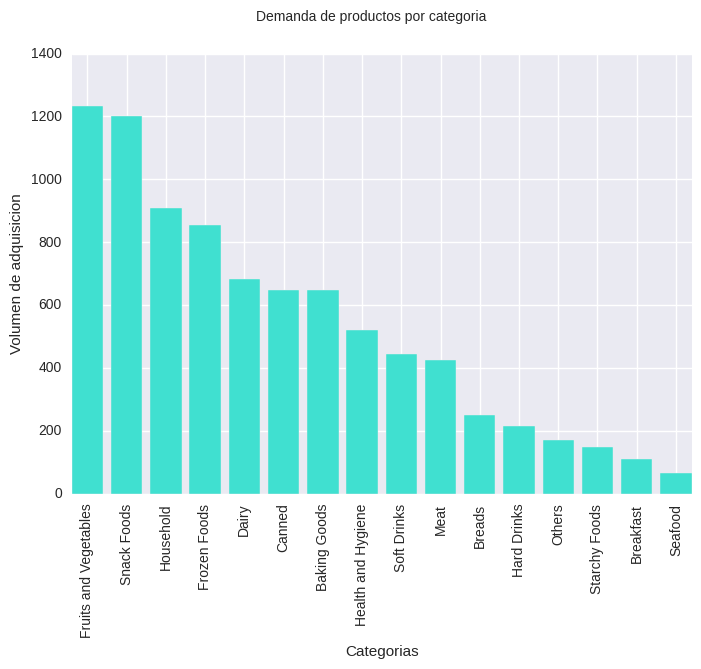

In [139]:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.dpi=100
axes.bar(df1.Item_Type.value_counts().index, df1.Item_Type.value_counts().values, color='turquoise')
fig.suptitle('Demanda de productos por categoria')
plt.xlabel('Categorias')
plt.ylabel('Volumen de adquisicion')
plt.xticks(rotation=90)
plt.show()

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [133]:
df1.Item_Type.value_counts().index.shape, df1.Item_Type.value_counts().values

((16,), (16,))

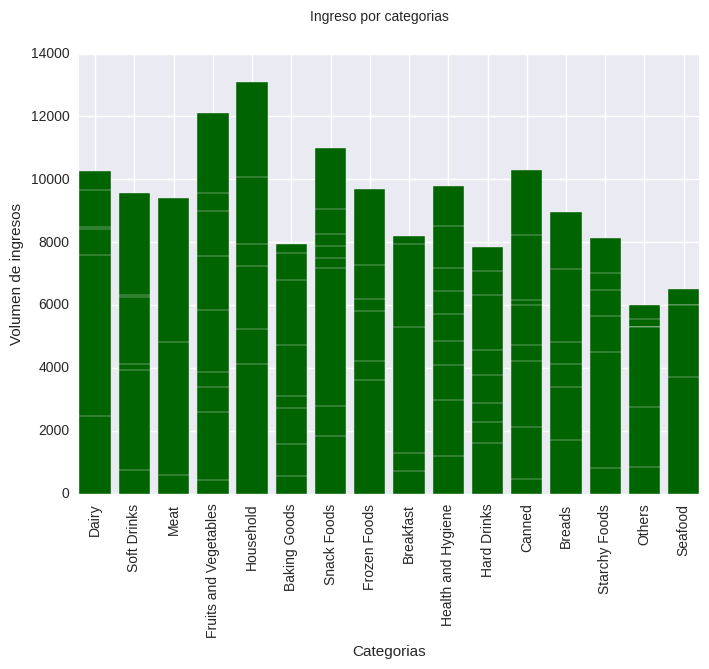

In [145]:
plt.style.use('seaborn')

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.dpi=100
axes.bar(df1.loc[:,'Item_Type'], df1.loc[:,'Item_Outlet_Sales'], color='darkgreen')
fig.suptitle('Ingreso por categorias')
plt.xlabel('Categorias')
plt.ylabel('Volumen de ingresos')
plt.xticks(rotation=90)
plt.show()